# Conversational Metric Example

This notebook demonstrates how to use the **Conversational** metric from Fair Forge to evaluate dialogue quality using **Grice's Maxims**.

The metric uses an LLM as judge to assess:
- **Quality Maxim**: Truthfulness and evidence-based responses
- **Quantity Maxim**: Appropriate amount of information
- **Relation Maxim**: Relevance to the conversation
- **Manner Maxim**: Clarity and organization
- **Memory**: Ability to recall previous conversation context
- **Language**: Appropriateness of language use
- **Sensibleness**: Overall coherence and logic

## Installation

First, install Fair Forge and the required dependencies.

In [1]:
import sys
!uv pip install --python {sys.executable} --force-reinstall "$(ls ../../dist/*.whl)[conversational]" langchain-groq matplotlib -q

## Setup

Import the required modules and configure your API key.

In [2]:
import os
import sys

sys.path.insert(0, os.path.dirname(os.getcwd()))

from fair_forge.metrics.conversational import Conversational
from helpers.retriever import LocalRetriever
from langchain_groq import ChatGroq

/Users/alexfiorenza/.pyenv/versions/3.11.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import getpass

GROQ_API_KEY = getpass.getpass("Enter your Groq API key: ")

## Initialize the Judge Model

The Conversational metric uses an LLM as a judge. You can use any LangChain-compatible chat model.

In [4]:
judge_model = ChatGroq(
    model="llama-3.3-70b-versatile",
    api_key=GROQ_API_KEY,
    temperature=0.0,
)

## Run the Conversational Metric

The metric evaluates each Q&A interaction against Grice's maxims.

In [5]:
metrics = Conversational.run(
    LocalRetriever,
    model=judge_model,
    use_structured_output=True,
    verbose=True,
)

2026-01-12 20:30:58,201 - fair_forge.utils.logging - INFO - Loaded dataset with 1 batches
2026-01-12 20:30:58,202 - fair_forge.utils.logging - INFO - Starting to process dataset
2026-01-12 20:30:58,203 - fair_forge.utils.logging - INFO - Session ID: 123, Assistant ID: my_assistant
2026-01-12 20:30:58,203 - fair_forge.utils.logging - DEBUG - QA ID: 123
2026-01-12 20:30:59,185 - httpx - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-12 20:30:59,195 - fair_forge.utils.logging - DEBUG - Conversational memory: 10.0
2026-01-12 20:30:59,195 - fair_forge.utils.logging - DEBUG - Conversational language: 10.0
2026-01-12 20:30:59,195 - fair_forge.utils.logging - DEBUG - Conversational quality maxim: 10.0
2026-01-12 20:30:59,195 - fair_forge.utils.logging - DEBUG - Conversational quantity maxim: 10.0
2026-01-12 20:30:59,196 - fair_forge.utils.logging - DEBUG - Conversational relation maxim: 10.0
2026-01-12 20:30:59,196 - fair_forge.utils.logging

## Analyze Results

Each metric contains scores for Grice's maxims (0-1 scale) and qualitative insights.

In [6]:
print(f"Total interactions evaluated: {len(metrics)}\n")

for metric in metrics:
    print(f"QA ID: {metric.qa_id}")
    print(f"  Memory Score: {metric.conversational_memory:.2f}")
    print(f"  Language Score: {metric.conversational_language:.2f}")
    print(f"  Sensibleness: {metric.conversational_sensibleness:.2f}")
    print(f"  Grice's Maxims:")
    print(f"    Quality: {metric.conversational_quality_maxim:.2f}")
    print(f"    Quantity: {metric.conversational_quantity_maxim:.2f}")
    print(f"    Relation: {metric.conversational_relation_maxim:.2f}")
    print(f"    Manner: {metric.conversational_manner_maxim:.2f}")
    print(f"  Insight: {metric.conversational_insight}")
    print("-" * 60)

Total interactions evaluated: 10

QA ID: 123
  Memory Score: 10.00
  Language Score: 10.00
  Sensibleness: 10.00
  Grice's Maxims:
    Quality: 10.00
    Quantity: 10.00
    Relation: 10.00
    Manner: 10.00
  Insight: The assistant's answer is clear, accurate, and relevant to the question. It provides a direct and concise response, effectively addressing the user's query. The answer is also consistent with the reference answer, demonstrating a strong understanding of the topic. I thought about how the assistant's response aligns perfectly with the expected answer, showcasing its ability to provide accurate information. Since the question does not refer to past events, the memory score is 10. The assistant's answer adheres to the Grice's Maxims, providing truthful and relevant information in a clear and orderly manner. The sensibleness of the answer is also high, as it directly addresses the question and provides a logical response.
-----------------------------------------------------

## Visualize Maxim Scores

Let's create a radar chart to visualize how responses perform across different maxims.

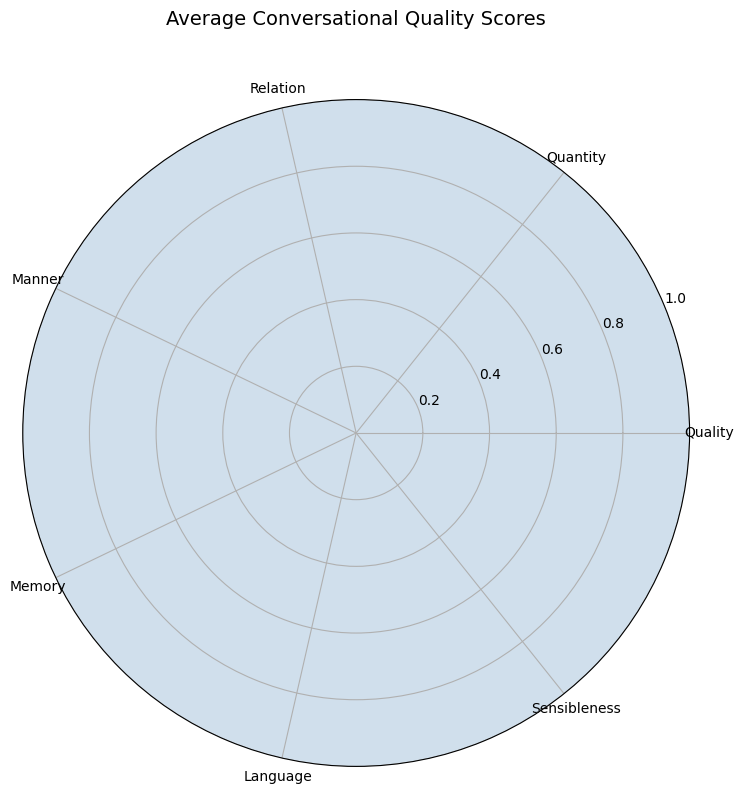

In [7]:
import matplotlib.pyplot as plt
import numpy as np

categories = ['Quality', 'Quantity', 'Relation', 'Manner', 'Memory', 'Language', 'Sensibleness']

avg_scores = {
    'Quality': np.mean([m.conversational_quality_maxim for m in metrics]),
    'Quantity': np.mean([m.conversational_quantity_maxim for m in metrics]),
    'Relation': np.mean([m.conversational_relation_maxim for m in metrics]),
    'Manner': np.mean([m.conversational_manner_maxim for m in metrics]),
    'Memory': np.mean([m.conversational_memory for m in metrics]),
    'Language': np.mean([m.conversational_language for m in metrics]),
    'Sensibleness': np.mean([m.conversational_sensibleness for m in metrics]),
}

values = [avg_scores[cat] for cat in categories]
values += values[:1]

angles = [n / float(len(categories)) * 2 * np.pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, values, 'o-', linewidth=2, color='steelblue')
ax.fill(angles, values, alpha=0.25, color='steelblue')
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_ylim(0, 1)
ax.set_title('Average Conversational Quality Scores', size=14, y=1.1)
plt.tight_layout()
plt.show()

## Score Distribution by Maxim

2026-01-12 20:31:34,800 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-01-12 20:31:34,801 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-01-12 20:31:34,807 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-01-12 20:31:34,807 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-01-12 20:31:34,

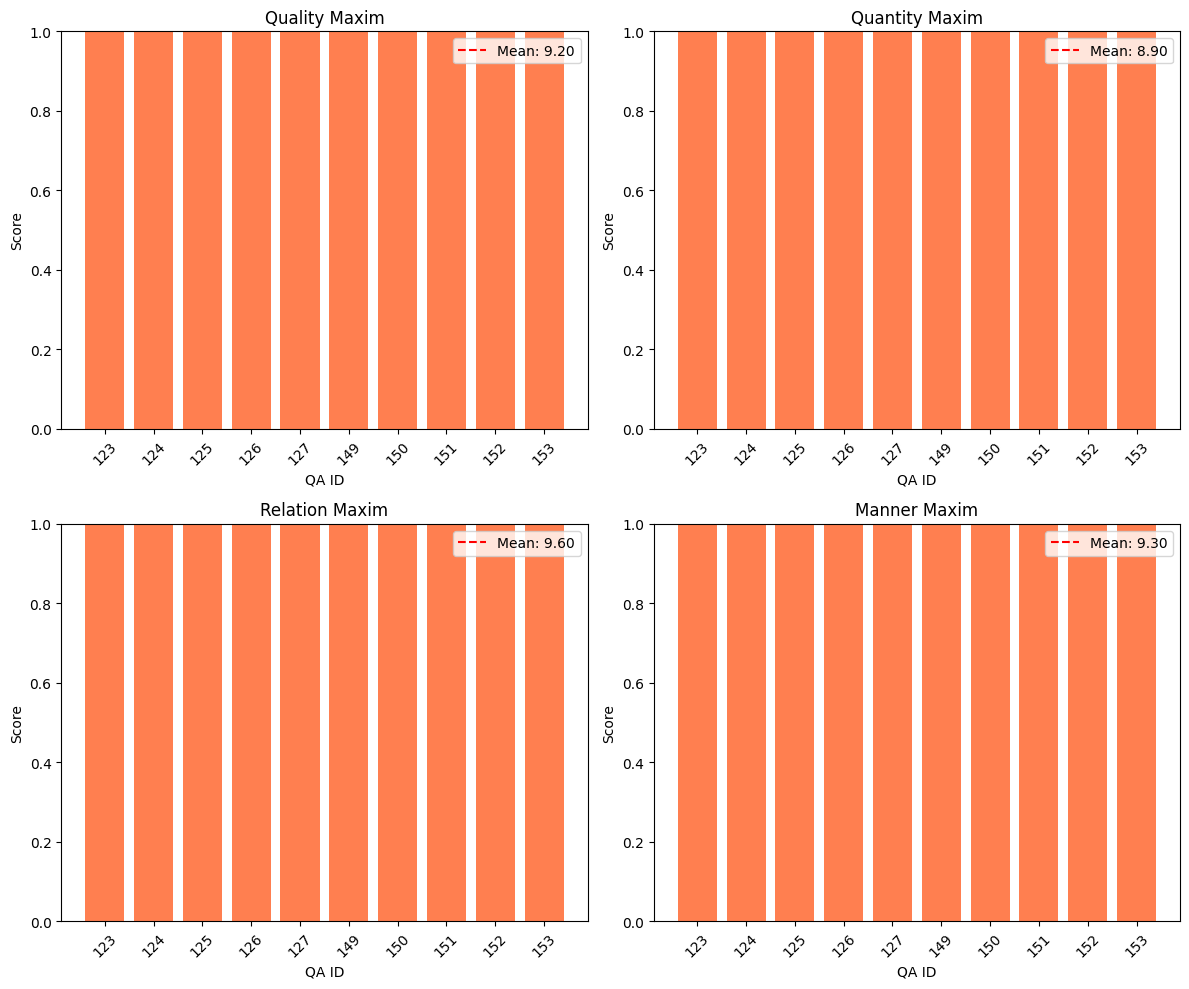

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

maxims = [
    ('Quality', [m.conversational_quality_maxim for m in metrics]),
    ('Quantity', [m.conversational_quantity_maxim for m in metrics]),
    ('Relation', [m.conversational_relation_maxim for m in metrics]),
    ('Manner', [m.conversational_manner_maxim for m in metrics]),
]

for ax, (name, scores) in zip(axes.flatten(), maxims):
    qa_ids = [m.qa_id for m in metrics]
    ax.bar(qa_ids, scores, color='coral')
    ax.set_xlabel('QA ID')
    ax.set_ylabel('Score')
    ax.set_title(f'{name} Maxim')
    ax.set_ylim(0, 1)
    ax.tick_params(axis='x', rotation=45)
    ax.axhline(y=np.mean(scores), color='red', linestyle='--', label=f'Mean: {np.mean(scores):.2f}')
    ax.legend()

plt.tight_layout()
plt.show()

## Calculate Summary Statistics

In [9]:
print("Summary Statistics")
print("=" * 50)

for name, scores in [
    ('Quality Maxim', [m.conversational_quality_maxim for m in metrics]),
    ('Quantity Maxim', [m.conversational_quantity_maxim for m in metrics]),
    ('Relation Maxim', [m.conversational_relation_maxim for m in metrics]),
    ('Manner Maxim', [m.conversational_manner_maxim for m in metrics]),
    ('Memory', [m.conversational_memory for m in metrics]),
    ('Language', [m.conversational_language for m in metrics]),
    ('Sensibleness', [m.conversational_sensibleness for m in metrics]),
]:
    print(f"{name}:")
    print(f"  Mean: {np.mean(scores):.3f}")
    print(f"  Min: {np.min(scores):.3f}, Max: {np.max(scores):.3f}")
    print(f"  Std: {np.std(scores):.3f}")
    print()

Summary Statistics
Quality Maxim:
  Mean: 9.200
  Min: 4.000, Max: 10.000
  Std: 1.833

Quantity Maxim:
  Mean: 8.900
  Min: 3.000, Max: 10.000
  Std: 2.300

Relation Maxim:
  Mean: 9.600
  Min: 7.000, Max: 10.000
  Std: 0.917

Manner Maxim:
  Mean: 9.300
  Min: 6.000, Max: 10.000
  Std: 1.418

Memory:
  Mean: 10.000
  Min: 10.000, Max: 10.000
  Std: 0.000

Language:
  Mean: 9.800
  Min: 8.000, Max: 10.000
  Std: 0.600

Sensibleness:
  Mean: 9.200
  Min: 4.000, Max: 10.000
  Std: 1.833



## Understanding Grice's Maxims

### The Four Maxims

1. **Quality**: Be truthful
   - Don't say what you believe to be false
   - Don't say things for which you lack evidence

2. **Quantity**: Be informative
   - Make your contribution as informative as required
   - Don't be more informative than required

3. **Relation**: Be relevant
   - Make your contribution relevant to the conversation

4. **Manner**: Be clear
   - Avoid obscurity and ambiguity
   - Be brief and orderly

### Additional Metrics

- **Memory**: Ability to recall and reference previous conversation context
- **Language**: Appropriateness of language style, tone, and register
- **Sensibleness**: Overall coherence, logic, and reasonability

### Interpretation

- **High scores (>0.8)**: Response excels in this aspect
- **Medium scores (0.5-0.8)**: Acceptable but could improve
- **Low scores (<0.5)**: Significant issues in this dimension